In [12]:
import platform
import matplotlib.pyplot as plt

# 운영체제에 따라 한글 폰트 설정
system_name = platform.system()

if system_name == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif system_name == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux or unknown
    plt.rcParams['font.family'] = 'NanumGothic'  # 설치되어 있어야 함

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print(f"✅ 한글 폰트 설정 완료: {plt.rcParams['font.family'][0]}")


✅ 한글 폰트 설정 완료: Malgun Gothic


In [1]:
# 📦 라이브러리
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 📂 데이터 불러오기
train_df = pd.read_csv('../../3_Post-Feature Engineering/YANG/train_data_with_smote.csv')
val_df = pd.read_csv('../../3_Post-Feature Engineering/YANG/val_data.csv')

# 🎯 X, y 분리
X_train = train_df.drop(columns='is_defaulted')
y_train = train_df['is_defaulted']
X_val = val_df.drop(columns='is_defaulted')
y_val = val_df['is_defaulted']

# ✅ 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📈 예측 및 평가 (Random Forest)
rf_preds = rf_model.predict(X_val)
rf_probs = rf_model.predict_proba(X_val)[:, 1]
print("📊 [Random Forest]")
print(confusion_matrix(y_val, rf_preds))
print(classification_report(y_val, rf_preds))
print("ROC-AUC:", roc_auc_score(y_val, rf_probs))

# ✅ 2. LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 📈 예측 및 평가 (LightGBM)
lgb_preds = lgb_model.predict(X_val)
lgb_probs = lgb_model.predict_proba(X_val)[:, 1]
print("\n📊 [LightGBM]")
print(confusion_matrix(y_val, lgb_preds))
print(classification_report(y_val, lgb_preds))
print("ROC-AUC:", roc_auc_score(y_val, lgb_probs))


📊 [Random Forest]
[[3411  162]
 [  45   33]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3573
           1       0.17      0.42      0.24        78

    accuracy                           0.94      3651
   macro avg       0.58      0.69      0.61      3651
weighted avg       0.97      0.94      0.95      3651

ROC-AUC: 0.8758674388397311
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16901, number of negative: 16901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 33802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

📊 [LightGBM]
[[3106  467]
 [  34   44]]
              precision    recall  f1-sc

In [2]:
# 📦 라이브러리
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# 📂 학습 데이터 불러오기
train_df = pd.read_csv('../../3_Post-Feature Engineering/YANG/train_data_with_smote.csv')
val_df = pd.read_csv('../../3_Post-Feature Engineering/YANG/val_data.csv')

# 🎯 X, y 분리
X_train = train_df.drop(columns='is_defaulted')
y_train = train_df['is_defaulted']
X_val = val_df.drop(columns='is_defaulted')
y_val = val_df['is_defaulted']

# ✅ 하이퍼파라미터 그리드 정의
param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300],
    'class_weight': [None, 'balanced']
}

# ✅ GridSearchCV 설정
lgb_model = LGBMClassifier(random_state=42)
grid = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# ⏳ 모델 학습
grid.fit(X_train, y_train)

# ✅ 최적 모델로 검증 데이터 예측
best_model = grid.best_estimator_
val_probs = best_model.predict_proba(X_val)[:, 1]
val_preds = best_model.predict(X_val)

# ✅ 평가
print("\n🎯 Best Parameters:")
print(grid.best_params_)

print("\n📈 Validation ROC-AUC:")
print(roc_auc_score(y_val, val_probs))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16901, number of negative: 16901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 33802, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

🎯 Best Parameters:
{'class_weight': None, 'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 63}

📈 Validation ROC-AUC:
0.8879039376520484


In [5]:
# 📦 필수 라이브러리
import warnings
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# 🚫 경고 억제
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/YANG/preprocessed_data.csv')

# 🧪 1. 파생 변수 생성 (Feature Engineering)
df['유동비율'] = df['유동자산(*)(IFRS)(천원)'] / (df['유동부채(*)(IFRS)(천원)'] + 1)
df['부채비율'] = df['부채(*)(IFRS)(천원)'] / (df['자본(*)(IFRS)(천원)'] + 1)
df['자산대비매출'] = df['매출액(수익)(*)(IFRS)(천원)'] / (df['자산(*)(IFRS)(천원)'] + 1)
df['총현금흐름'] = df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)'] + \
                 df['투자활동으로 인한 현금흐름(*)(IFRS)(천원)'] + \
                 df['재무활동으로 인한 현금흐름(*)(IFRS)(천원)']

# ⏱️ 회계년도 기준 시계열 정렬
df = df.sort_values(by='회계년도')

# 🎯 X, y 분리
X = df.drop(columns=['is_defaulted', '회사명', '회계년도'], errors='ignore')
y = df['is_defaulted']
X = X.select_dtypes(include=np.number)

# 🧪 2. TimeSeriesSplit (마지막 fold 사용)
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# 📏 3. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 🔄 4. SMOTETomek 적용 (잡음 제거형 오버샘플링)
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.reset_index(drop=True))

# 🚀 5. Optuna 튜닝 함수 정의
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1
    }

    model = LGBMClassifier(**params)
    model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)
    val_probs = model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
    return roc_auc_score(y_val, val_probs)

# 🔍 Optuna 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# ✅ 6. 최적 모델 학습 및 평가
print("🎯 Best Params:", study.best_params)

final_model = LGBMClassifier(**study.best_params, class_weight='balanced', random_state=42, verbose=-1)
final_model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)
val_probs = final_model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
roc_auc = roc_auc_score(y_val, val_probs)

print(f"📈 최종 Validation ROC-AUC: {roc_auc:.5f}")


🎯 Best Params: {'n_estimators': 364, 'learning_rate': 0.08925829047842165, 'num_leaves': 92, 'max_depth': 14, 'min_child_samples': 92, 'subsample': 0.7787150718259972, 'colsample_bytree': 0.7371395943102103}
📈 최종 Validation ROC-AUC: 0.92560


📊 Confusion Matrix
[[3456  117]
 [  36   42]]

📄 Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3573
           1       0.26      0.54      0.35        78

    accuracy                           0.96      3651
   macro avg       0.63      0.75      0.67      3651
weighted avg       0.97      0.96      0.97      3651


📈 Validation ROC-AUC: 0.90796


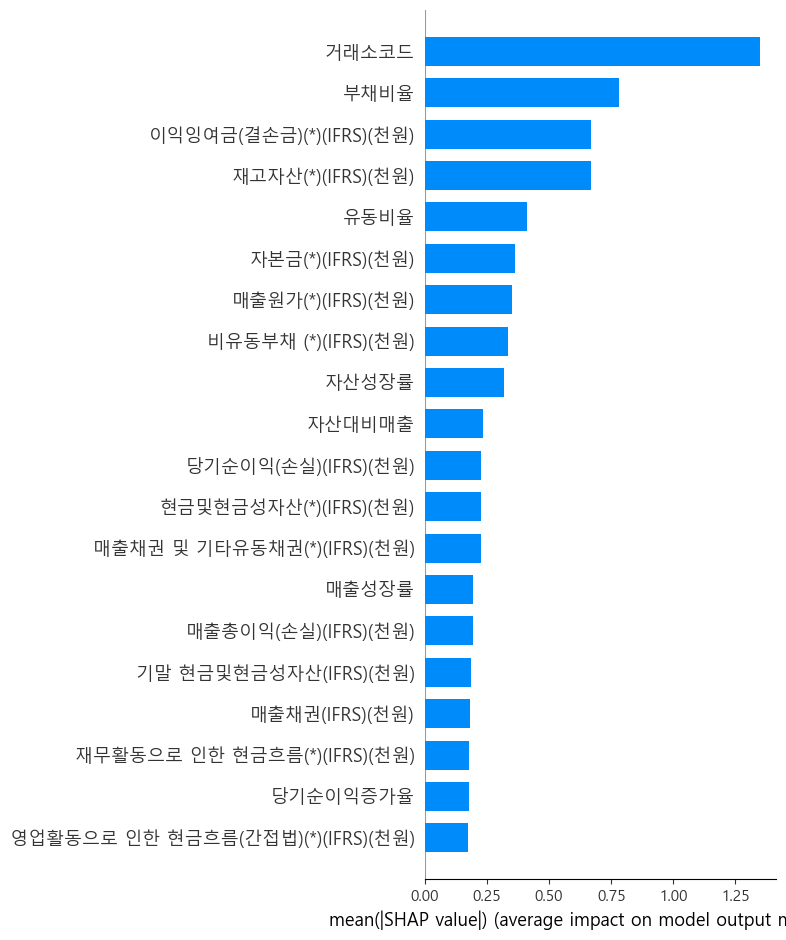

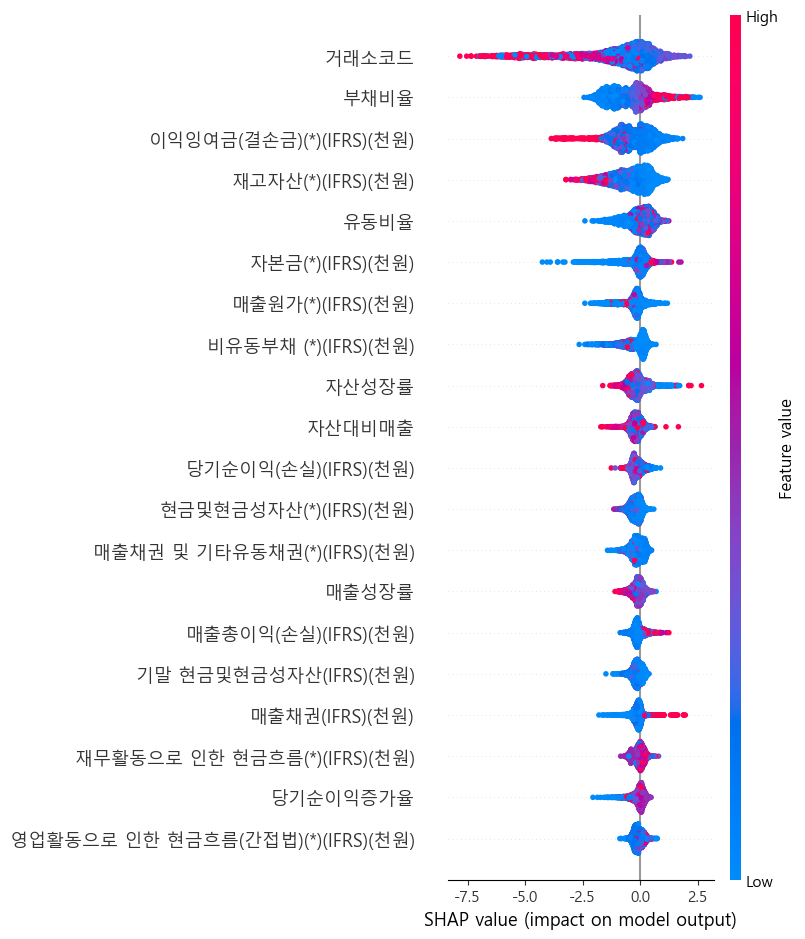

In [13]:
# 📦 필수 라이브러리
import warnings
import optuna
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# 🚫 경고 제거
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/YANG/preprocessed_data.csv')

# 🧪 파생 변수 생성
df = df.sort_values(by=['회사명', '회계년도'])
df['매출성장률'] = df.groupby('회사명')['매출액(수익)(*)(IFRS)(천원)'].pct_change()
df['자산성장률'] = df.groupby('회사명')['자산(*)(IFRS)(천원)'].pct_change()
df['당기순이익증가율'] = df.groupby('회사명')['당기순이익(손실)(IFRS)(천원)'].pct_change()
df['유동비율'] = df['유동자산(*)(IFRS)(천원)'] / (df['유동부채(*)(IFRS)(천원)'] + 1)
df['부채비율'] = df['부채(*)(IFRS)(천원)'] / (df['자본(*)(IFRS)(천원)'] + 1)
df['자산대비매출'] = df['매출액(수익)(*)(IFRS)(천원)'] / (df['자산(*)(IFRS)(천원)'] + 1)
df['총현금흐름'] = (
    df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)'] +
    df['투자활동으로 인한 현금흐름(*)(IFRS)(천원)'] +
    df['재무활동으로 인한 현금흐름(*)(IFRS)(천원)']
)

# ⏱️ 회계년도 기준 정렬
df = df.sort_values(by='회계년도')

# 🎯 X, y 분리
X = df.drop(columns=['is_defaulted', '회사명', '회계년도'], errors='ignore').select_dtypes(include=np.number)
y = df['is_defaulted']

# 🧹 결측치, 무한값 처리
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# ⏳ TimeSeriesSplit (5개 분할 중 마지막 fold 사용)
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# 📏 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 🔄 SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.reset_index(drop=True))

# 🧠 최적 하이퍼파라미터 (Optuna 결과 기반)
best_params = {
    'n_estimators': 337,
    'learning_rate': 0.08186,
    'num_leaves': 111,
    'max_depth': 15,
    'min_child_samples': 24,
    'subsample': 0.8095,
    'colsample_bytree': 0.7347,
    'class_weight': 'balanced',
    'random_state': 42,
    'verbose': -1
}

# 🚀 모델 학습
final_model = LGBMClassifier(**best_params)
final_model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)

# 🧪 예측 및 평가
val_probs = final_model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
val_preds = final_model.predict(pd.DataFrame(X_val_scaled, columns=X.columns))

print("📊 Confusion Matrix")
print(confusion_matrix(y_val, val_preds))
print("\n📄 Classification Report")
print(classification_report(y_val, val_preds))
print(f"\n📈 Validation ROC-AUC: {roc_auc_score(y_val, val_probs):.5f}")

# 🔍 SHAP 분석
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(pd.DataFrame(X_val_scaled, columns=X.columns))

# 🔀 이진 분류: 리스트인지 아닌지 확인 후 선택
if isinstance(shap_values, list):
    shap_to_use = shap_values[1]  # Positive class
else:
    shap_to_use = shap_values     # 단일 클래스인 경우

# 📊 SHAP 시각화
shap.summary_plot(shap_to_use, pd.DataFrame(X_val_scaled, columns=X.columns), plot_type="bar")
shap.summary_plot(shap_to_use, pd.DataFrame(X_val_scaled, columns=X.columns))


📊 Confusion Matrix
[[3216  253]
 [ 148   34]]

📄 Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      3469
           1       0.12      0.19      0.14       182

    accuracy                           0.89      3651
   macro avg       0.54      0.56      0.54      3651
weighted avg       0.91      0.89      0.90      3651


📈 Validation ROC-AUC: 0.69625


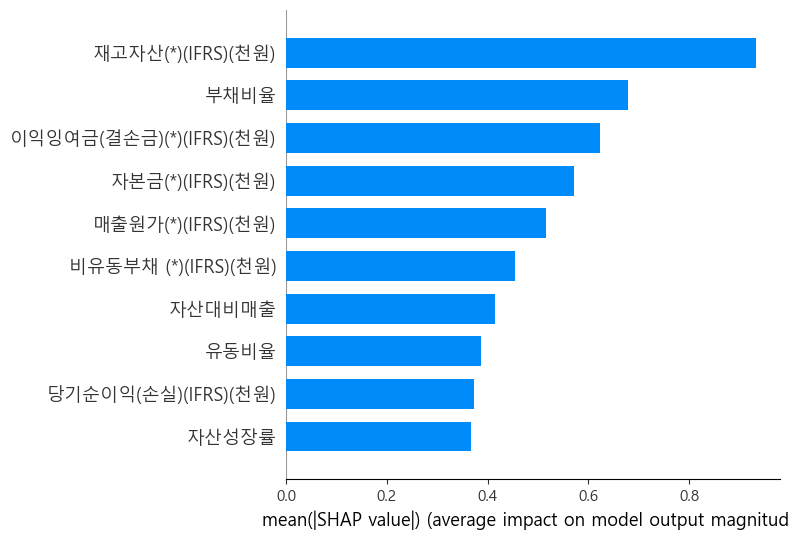

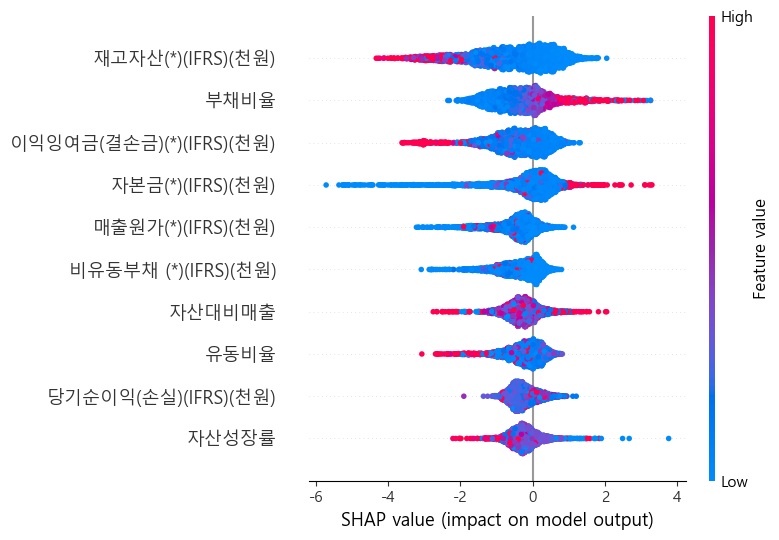

In [14]:
# 📦 필수 라이브러리
import warnings
import optuna
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# 🚫 경고 제거
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/YANG/preprocessed_data.csv')

# 🧪 파생 변수 생성
df = df.sort_values(by=['회사명', '회계년도'])
df['매출성장률'] = df.groupby('회사명')['매출액(수익)(*)(IFRS)(천원)'].pct_change()
df['자산성장률'] = df.groupby('회사명')['자산(*)(IFRS)(천원)'].pct_change()
df['당기순이익증가율'] = df.groupby('회사명')['당기순이익(손실)(IFRS)(천원)'].pct_change()
df['유동비율'] = df['유동자산(*)(IFRS)(천원)'] / (df['유동부채(*)(IFRS)(천원)'] + 1)
df['부채비율'] = df['부채(*)(IFRS)(천원)'] / (df['자본(*)(IFRS)(천원)'] + 1)
df['자산대비매출'] = df['매출액(수익)(*)(IFRS)(천원)'] / (df['자산(*)(IFRS)(천원)'] + 1)
df['총현금흐름'] = (
    df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)'] +
    df['투자활동으로 인한 현금흐름(*)(IFRS)(천원)'] +
    df['재무활동으로 인한 현금흐름(*)(IFRS)(천원)']
)

# ✅ 거래소코드 제거
df.drop(columns=['거래소코드'], inplace=True, errors='ignore')

# 🎯 X, y 분리
X = df.drop(columns=['is_defaulted', '회사명', '회계년도'], errors='ignore').select_dtypes(include=np.number)
y = df['is_defaulted']

# 🧹 결측치 및 무한값 처리
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# ✅ SHAP 상위 변수만 선택
top_features = [
    '부채비율', '이익잉여금(결손금)(*)(IFRS)(천원)', '재고자산(*)(IFRS)(천원)', '유동비율',
    '자본금(*)(IFRS)(천원)', '매출원가(*)(IFRS)(천원)', '비유동부채 (*)(IFRS)(천원)',
    '자산성장률', '자산대비매출', '당기순이익(손실)(IFRS)(천원)'
]
X = X[top_features]

# ⏳ TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# 📏 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 🔄 SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.reset_index(drop=True))

# 🧠 LightGBM 파라미터 (Optuna 기반 최적값)
best_params = {
    'n_estimators': 337,
    'learning_rate': 0.08186,
    'num_leaves': 111,
    'max_depth': 15,
    'min_child_samples': 24,
    'subsample': 0.8095,
    'colsample_bytree': 0.7347,
    'class_weight': 'balanced',
    'random_state': 42,
    'verbose': -1
}

# 🚀 모델 학습
final_model = LGBMClassifier(**best_params)
final_model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)

# 🧪 예측 및 평가
val_probs = final_model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
val_preds = final_model.predict(pd.DataFrame(X_val_scaled, columns=X.columns))

print("📊 Confusion Matrix")
print(confusion_matrix(y_val, val_preds))
print("\n📄 Classification Report")
print(classification_report(y_val, val_preds))
print(f"\n📈 Validation ROC-AUC: {roc_auc_score(y_val, val_probs):.5f}")

# 🔍 SHAP 해석
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(pd.DataFrame(X_val_scaled, columns=X.columns))

# SHAP 값 구조에 따라 분기
if isinstance(shap_values, list):
    shap_to_use = shap_values[1]  # 양성 클래스
else:
    shap_to_use = shap_values

# ✅ 한글 깨짐 방지 (윈도우 기준)
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 📊 SHAP 시각화
shap.summary_plot(shap_to_use, pd.DataFrame(X_val_scaled, columns=X.columns), plot_type="bar")
shap.summary_plot(shap_to_use, pd.DataFrame(X_val_scaled, columns=X.columns))


📊 Confusion Matrix
[[3318  151]
 [ 145   37]]

📄 Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3469
           1       0.20      0.20      0.20       182

    accuracy                           0.92      3651
   macro avg       0.58      0.58      0.58      3651
weighted avg       0.92      0.92      0.92      3651


📈 Validation ROC-AUC: 0.72896


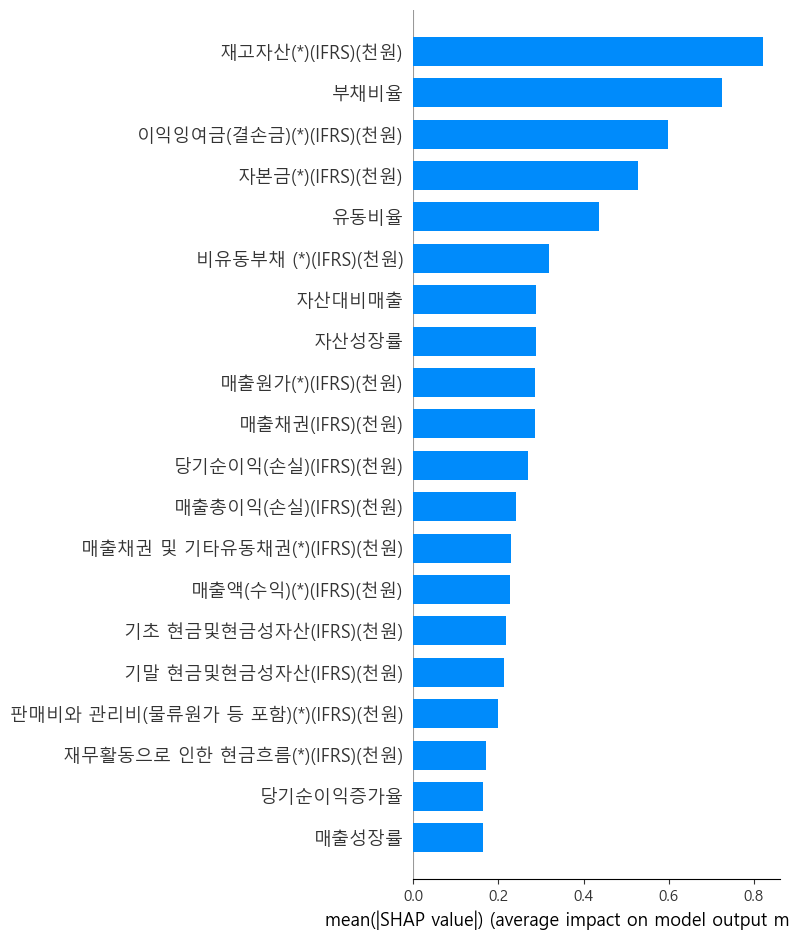

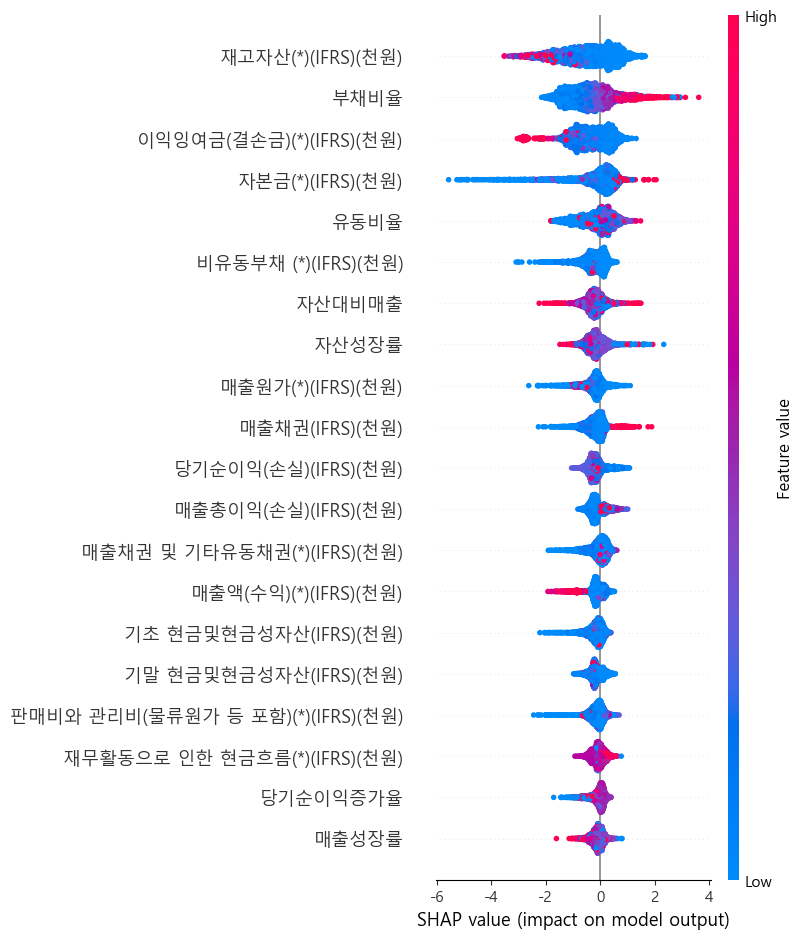

In [15]:
# 📦 라이브러리
import warnings
import optuna
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# 🚫 경고 제거
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/YANG/preprocessed_data.csv')

# 🧪 파생 변수 생성
df = df.sort_values(by=['회사명', '회계년도'])
df['매출성장률'] = df.groupby('회사명')['매출액(수익)(*)(IFRS)(천원)'].pct_change()
df['자산성장률'] = df.groupby('회사명')['자산(*)(IFRS)(천원)'].pct_change()
df['당기순이익증가율'] = df.groupby('회사명')['당기순이익(손실)(IFRS)(천원)'].pct_change()
df['유동비율'] = df['유동자산(*)(IFRS)(천원)'] / (df['유동부채(*)(IFRS)(천원)'] + 1)
df['부채비율'] = df['부채(*)(IFRS)(천원)'] / (df['자본(*)(IFRS)(천원)'] + 1)
df['자산대비매출'] = df['매출액(수익)(*)(IFRS)(천원)'] / (df['자산(*)(IFRS)(천원)'] + 1)
df['총현금흐름'] = (
    df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)'] +
    df['투자활동으로 인한 현금흐름(*)(IFRS)(천원)'] +
    df['재무활동으로 인한 현금흐름(*)(IFRS)(천원)']
)

# ❌ 거래소코드 제거
df.drop(columns=['거래소코드'], inplace=True, errors='ignore')

# 🎯 X, y 분리
X = df.drop(columns=['is_defaulted', '회사명', '회계년도'], errors='ignore').select_dtypes(include=np.number)
y = df['is_defaulted']

# 🧹 결측치 및 무한값 처리
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# ⏳ TimeSeriesSplit (5개 중 마지막 fold)
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# 📏 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 🔄 SMOTETomek 적용
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.reset_index(drop=True))

# 🧠 Optuna 최적 파라미터 사용
best_params = {
    'n_estimators': 337,
    'learning_rate': 0.08186,
    'num_leaves': 111,
    'max_depth': 15,
    'min_child_samples': 24,
    'subsample': 0.8095,
    'colsample_bytree': 0.7347,
    'class_weight': 'balanced',
    'random_state': 42,
    'verbose': -1
}

# 🚀 LightGBM 학습
final_model = LGBMClassifier(**best_params)
final_model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)

# 🧪 예측 및 평가
val_probs = final_model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
val_preds = final_model.predict(pd.DataFrame(X_val_scaled, columns=X.columns))

print("📊 Confusion Matrix")
print(confusion_matrix(y_val, val_preds))
print("\n📄 Classification Report")
print(classification_report(y_val, val_preds))
print(f"\n📈 Validation ROC-AUC: {roc_auc_score(y_val, val_probs):.5f}")

# 🔍 SHAP 분석
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(pd.DataFrame(X_val_scaled, columns=X.columns))
shap_to_use = shap_values[1] if isinstance(shap_values, list) else shap_values

# ✅ 한글 폰트 설정
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 📊 SHAP 시각화
shap.summary_plot(shap_to_use, pd.DataFrame(X_val_scaled, columns=X.columns), plot_type="bar")
shap.summary_plot(shap_to_use, pd.DataFrame(X_val_scaled, columns=X.columns))


In [16]:
# 📦 필수 라이브러리
import warnings
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier

# 🚫 경고 억제
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/YANG/preprocessed_data.csv')

# 🧪 파생 변수 생성
df['유동비율'] = df['유동자산(*)(IFRS)(천원)'] / (df['유동부채(*)(IFRS)(천원)'] + 1)
df['부채비율'] = df['부채(*)(IFRS)(천원)'] / (df['자본(*)(IFRS)(천원)'] + 1)
df['자산대비매출'] = df['매출액(수익)(*)(IFRS)(천원)'] / (df['자산(*)(IFRS)(천원)'] + 1)
df['총현금흐름'] = df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)'] + \
                   df['투자활동으로 인한 현금흐름(*)(IFRS)(천원)'] + \
                   df['재무활동으로 인한 현금흐름(*)(IFRS)(천원)']

# ⏱️ 회계년도 기준 정렬
df = df.sort_values(by='회계년도')

# 🎯 X, y 분리
X = df.drop(columns=['is_defaulted', '회사명', '회계년도'], errors='ignore')
y = df['is_defaulted']
X = X.select_dtypes(include=np.number)

# 🧪 TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# 📏 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 🔄 SMOTETomek
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.reset_index(drop=True))

# 🚀 Optuna 목적 함수 (🔁 recall 기준)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1
    }

    model = LGBMClassifier(**params)
    model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)
    
    # 임계값 0.3 적용
    val_probs = model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
    val_preds = (val_probs >= 0.3).astype(int)

    return recall_score(y_val, val_preds)

# 🔍 Optuna 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# ✅ 최종 모델 학습 및 평가
print("🎯 Best Params:", study.best_params)

final_model = LGBMClassifier(**study.best_params, class_weight='balanced', random_state=42, verbose=-1)
final_model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)

val_probs = final_model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
val_preds = (val_probs >= 0.3).astype(int)

# 📊 평가
print("\n📊 Confusion Matrix")
print(confusion_matrix(y_val, val_preds))

print("\n📄 Classification Report")
print(classification_report(y_val, val_preds))

print(f"\n📈 Validation ROC-AUC: {roc_auc_score(y_val, val_probs):.5f}")


🎯 Best Params: {'n_estimators': 127, 'learning_rate': 0.01053168290280847, 'num_leaves': 19, 'max_depth': 8, 'min_child_samples': 99, 'subsample': 0.5004552656898379, 'colsample_bytree': 0.5115875877866128}

📊 Confusion Matrix
[[ 901 2672]
 [   3   75]]

📄 Classification Report
              precision    recall  f1-score   support

           0       1.00      0.25      0.40      3573
           1       0.03      0.96      0.05        78

    accuracy                           0.27      3651
   macro avg       0.51      0.61      0.23      3651
weighted avg       0.98      0.27      0.40      3651


📈 Validation ROC-AUC: 0.78899


In [17]:
# 📦 필수 라이브러리
import warnings
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, f1_score
)

# 🚫 경고 억제
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

# 📂 데이터 불러오기
df = pd.read_csv('../../1_preprocessing/YANG/preprocessed_data.csv')

# 🧪 파생 변수 생성
df['유동비율'] = df['유동자산(*)(IFRS)(천원)'] / (df['유동부채(*)(IFRS)(천원)'] + 1)
df['부채비율'] = df['부채(*)(IFRS)(천원)'] / (df['자본(*)(IFRS)(천원)'] + 1)
df['자산대비매출'] = df['매출액(수익)(*)(IFRS)(천원)'] / (df['자산(*)(IFRS)(천원)'] + 1)
df['총현금흐름'] = (
    df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)'] +
    df['투자활동으로 인한 현금흐름(*)(IFRS)(천원)'] +
    df['재무활동으로 인한 현금흐름(*)(IFRS)(천원)']
)

# ⏱️ 정렬
df = df.sort_values(by='회계년도')

# 🎯 X, y 분리
X = df.drop(columns=['is_defaulted', '회사명', '회계년도'], errors='ignore')
y = df['is_defaulted']
X = X.select_dtypes(include=np.number)

# ⏳ TimeSeriesSplit (마지막 fold)
tscv = TimeSeriesSplit(n_splits=5)
for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

# ⚖️ 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 🔄 SMOTETomek 적용
sm = SMOTETomek(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train.reset_index(drop=True))

# 🎯 Optuna 최적화
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1
    }

    model = LGBMClassifier(**params)
    model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)
    val_probs = model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
    return roc_auc_score(y_val, val_probs)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# ✅ 최적 모델 학습
print("🎯 Best Params:", study.best_params)
final_model = LGBMClassifier(**study.best_params, class_weight='balanced', random_state=42, verbose=-1)
final_model.fit(pd.DataFrame(X_train_res, columns=X.columns), y_train_res)

# 📊 예측 및 평가
val_probs = final_model.predict_proba(pd.DataFrame(X_val_scaled, columns=X.columns))[:, 1]
val_preds = (val_probs >= 0.4).astype(int)  # threshold 조정 가능

print("📊 Confusion Matrix")
print(confusion_matrix(y_val, val_preds))

print("\n📄 Classification Report")
print(classification_report(y_val, val_preds, digits=2))

print(f"\n📈 Validation ROC-AUC: {roc_auc_score(y_val, val_probs):.5f}")
print(f"🎯 Validation F1-score: {f1_score(y_val, val_preds):.5f}")


🎯 Best Params: {'n_estimators': 476, 'learning_rate': 0.09831835957297326, 'num_leaves': 89, 'max_depth': 11, 'min_child_samples': 43, 'subsample': 0.6764847682534791, 'colsample_bytree': 0.8235507911954092}
📊 Confusion Matrix
[[3449  124]
 [  34   44]]

📄 Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3573
           1       0.26      0.56      0.36        78

    accuracy                           0.96      3651
   macro avg       0.63      0.76      0.67      3651
weighted avg       0.97      0.96      0.96      3651


📈 Validation ROC-AUC: 0.92221
🎯 Validation F1-score: 0.35772
